# **Project Overview** - KNN

In this analysis, we applied a K-Nearest Neighbors (KNN) regression model to the "Housing.csv" dataset. After preprocessing the data, the model was trained and evaluated. Key observations include:

**Model Performance:** Moderate accuracy in predicting house prices, as indicated by metrics like R-squared and MSE.

**Parameter Tuning:** Analysis of MSE across different 'k' values suggested potential for tuning the model for better performance.

**Learning Behavior**: The learning curve analysis revealed how the model's error rates changed with different training set sizes, highlighting its learning capabilities and areas for improvement.

**Data Loading**

In [63]:
# Loading the provided housing dataset
import pandas as pd

# File path to the housing dataset
housing_dataset_path = '/content/Housing.csv'

# Reading the housing dataset
housing_df = pd.read_csv(housing_dataset_path)

# Displaying the first few rows of the dataset to understand its structure
housing_df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Data Cleaning and Pre-preprocessing**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling categorical variables
# Converting 'yes'/'no' to 1/0
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    housing_df[col] = housing_df[col].map({'yes': 1, 'no': 0})

# Converting 'furnishingstatus' to numerical values
housing_df['furnishingstatus'] = LabelEncoder().fit_transform(housing_df['furnishingstatus'])

# Separating the target variable (price) and feature variables
X = housing_df.drop('price', axis=1)
y = housing_df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying the transformed feature data
X_train_scaled[:5], X_test_scaled[:5]


(array([[ 0.38416819,  0.05527092,  1.53917323,  2.58764353,  0.40715525,
         -0.46677307, -0.74642003, -0.23052136,  1.50124327,  0.36795665,
         -0.55262032, -1.40940148],
        [ 0.9291807 ,  0.05527092,  1.53917323, -0.91249891,  0.40715525,
         -0.46677307,  1.33972825, -0.23052136,  1.50124327,  2.70998729,
         -0.55262032, -0.07931697],
        [-0.60775457, -1.28351359, -0.5579503 , -0.91249891,  0.40715525,
         -0.46677307,  1.33972825, -0.23052136,  1.50124327,  1.53897197,
         -0.55262032, -1.40940148],
        [-1.15549214,  0.05527092, -0.5579503 ,  0.25421524,  0.40715525,
         -0.46677307,  1.33972825, -0.23052136, -0.66611456, -0.80305867,
          1.80956067,  1.25076755],
        [-0.63773026,  0.05527092, -0.5579503 ,  0.25421524,  0.40715525,
         -0.46677307, -0.74642003, -0.23052136, -0.66611456, -0.80305867,
         -0.55262032,  1.25076755]]),
 array([[ 0.33875048,  1.39405543,  1.53917323,  0.25421524, -2.45606557,
    

**Build Model- KNN and Model Metric Evaluation**

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Building the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Using 5 as an initial guess for k

# Training the model
knn_regressor.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = knn_regressor.predict(X_test_scaled)

# Evaluating the model
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r_squared, mse, mae, rmse


(0.583257108162042, 2106456221466.055, 1035402.752293578, 1451363.5731497656)

**R-squared:**
0.583.

 This value indicates that approximately 58.3% of the variance in the house prices can be explained by the model. A higher R-squared value would indicate a better fit to the data.

**Mean Squared Error (MSE)**: 2,106,456,221,466.06
This represents the average squared difference between the actual and predicted prices.

**Mean Absolute Error (MAE**):
1
,
035
,
402.75
1,035,402.75. This is the average absolute difference between the actual and predicted prices.

**Root Mean Squared Error (RMSE**):
1
,
451
,
363.57
1,451,363.57.
**RMSE** is the square root of MSE and gives a sense of the average error magnitude.

** Model performance plot**

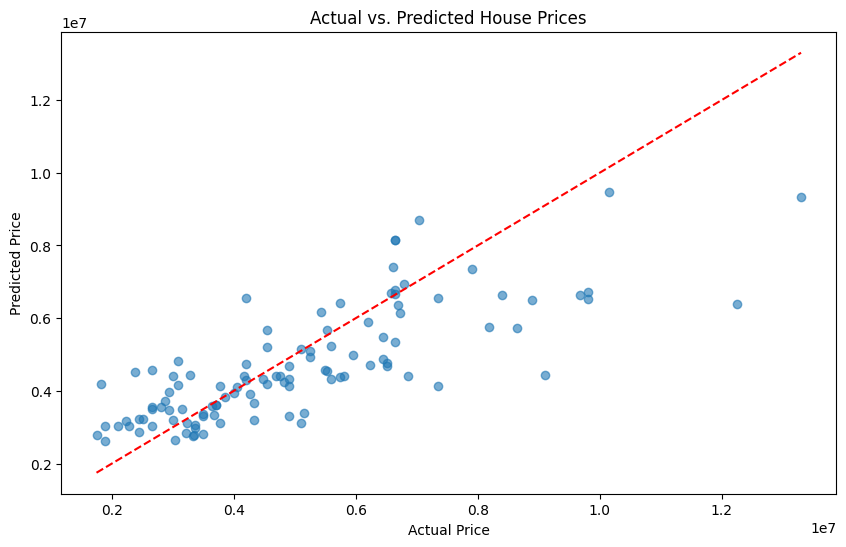

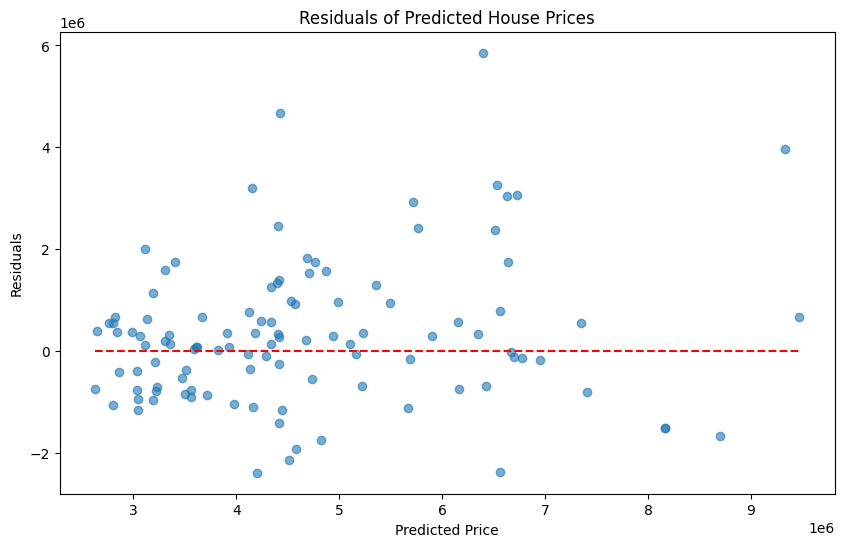

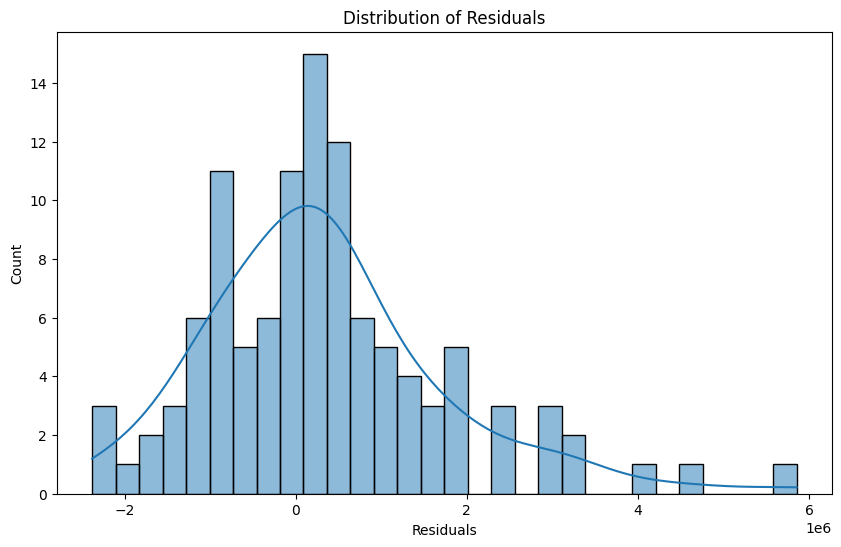

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()

# 2. Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted House Prices')
plt.show()

# 3. Plotting the distribution of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


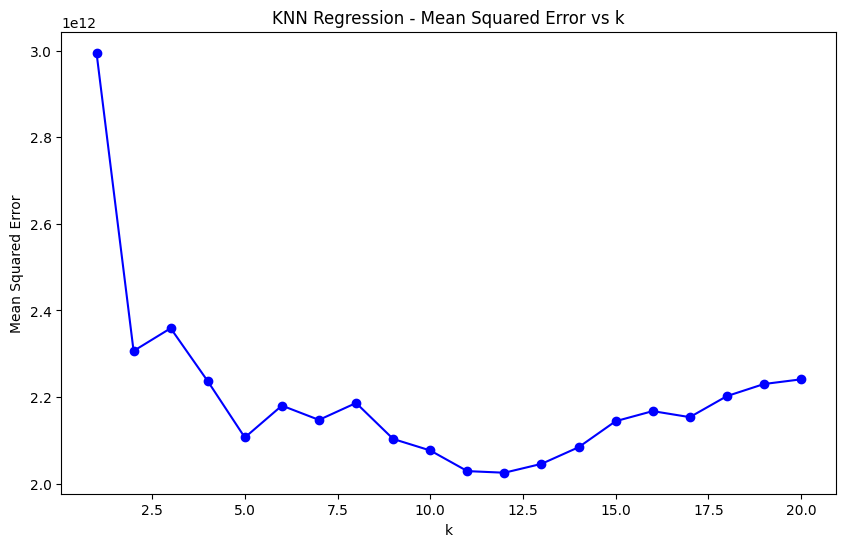

In [67]:
# Plotting mean squared error vs k for KNN regression

k_values = range(1, 21)
mse_values = []

# Calculating MSE for different k values
for k in k_values:
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train_scaled, y_train)  # Make sure to use scaled data
    y_pred = regressor.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, 'bo-')  # Blue circles with line
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression - Mean Squared Error vs k')
plt.show()


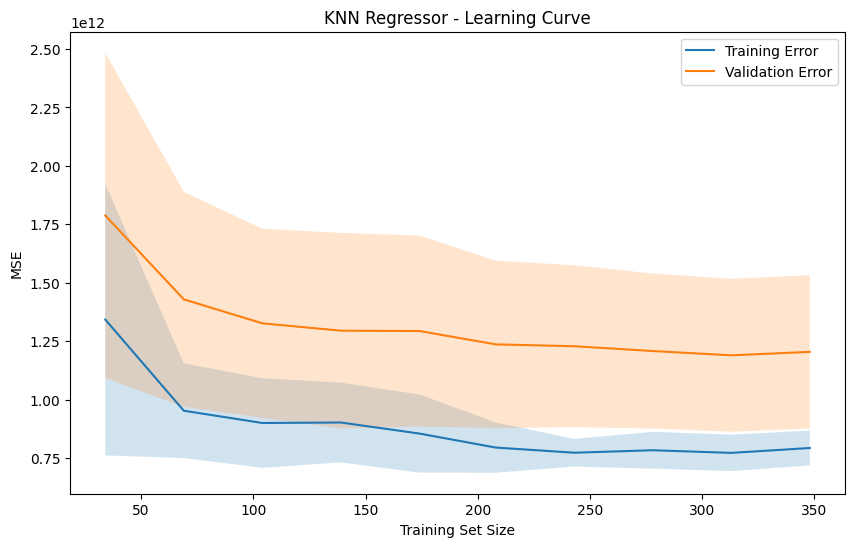

In [70]:
from sklearn.model_selection import learning_curve
import numpy as np

# Define the training sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
# Using the previously trained knn_regressor model
train_sizes, train_scores, test_scores = learning_curve(
    knn_regressor, X_train_scaled, y_train, cv=5, train_sizes=train_sizes,
    scoring='neg_mean_squared_error', shuffle=True)

# Calculate the mean and standard deviation of the training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation Error')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("KNN Regressor - Learning Curve")
plt.legend()
plt.show()


# **Conclusion**

**Model Accuracy:** The model demonstrated moderate accuracy in predicting house prices, with an R-squared value of around 0.583. This suggests room for improvement either in model tuning or by exploring alternative modeling approaches.

**Error Analysis:** The mean squared error (MSE) plots against different 'k' values indicated that the choice of 'k' significantly impacts the model's performance, highlighting the importance of parameter tuning in KNN models.